In [113]:
# Define the path to the sample data file:

SAMPLE_DATA_FILE_PATH: str = "20250801_resistance_vs_illuminance.csv"

In [114]:
# Import modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Read the sample data:

sample_data_df: pd.DataFrame = pd.read_csv(
    SAMPLE_DATA_FILE_PATH,
    sep=",",
    dtype={"illuminance_lux": float, "resistance_ohm": float},
)

sample_data_df.describe()

,resistance_ohm,illuminance_lux
count,1.510000e+02,151.000000
mean,4.135169e+04,1655.635762
std,4.321589e+05,2108.039223
min,9.000000e+01,1.000000
25%,3.600000e+02,375.000000
50%,1.480000e+03,750.000000
75%,3.715000e+03,2250.000000
max,5.310000e+06,10000.000000


In [116]:
# Calculate the logarithm of the data:

sample_data_df["log_resistance_ohm"] = np.log(sample_data_df["resistance_ohm"])
sample_data_df["log_illuminance_lux"] = np.log(sample_data_df["illuminance_lux"])
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux
0,5310000.0,1.0,15.485102,0.000000
1,230000.0,10.0,12.345835,2.302585
2,101000.0,20.0,11.522876,2.995732
3,67000.0,30.0,11.112448,3.401197
4,48500.0,40.0,10.789319,3.688879


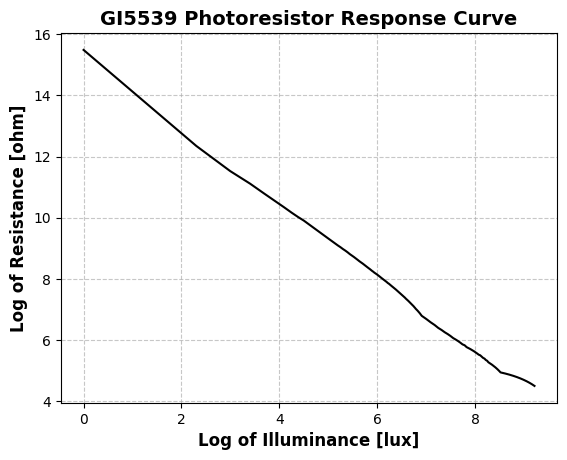

In [117]:
# Plot the raw data:

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log of Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log of Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)

plt.show()

In [118]:
# Linear regression: Calculate the slope and intercept:

gamma, log_r0 = np.polyfit(
    sample_data_df["log_illuminance_lux"], sample_data_df["log_resistance_ohm"], 1
)
r0 = np.exp(log_r0)

print(f"Gamma: {gamma}")
print(f"R0: {r0}")

Gamma: -1.210694965941999
R0: 4532786.466594595


In [119]:
# Define the photoresistor function:


def photoresistor(lux: float) -> float:
    """
    Calculate the resistance of a photoresistor.

    Args:
        lux: The illuminance in lux.

    Returns:
        The resistance in ohms.
    """

    return r0 * (lux**gamma)

In [120]:
# Compute the calculated resistance:

sample_data_df["calculated_resistance_ohm"] = sample_data_df["illuminance_lux"].apply(
    lambda x: photoresistor(x)
)
sample_data_df["log_calculated_resistance_ohm"] = np.log(
    sample_data_df["calculated_resistance_ohm"]
)
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux,calculated_resistance_ohm,log_calculated_resistance_ohm
0,5310000.0,1.0,15.485102,0.000000,4.532786e+06,15.326847
1,230000.0,10.0,12.345835,2.302585,2.790425e+05,12.539119
2,101000.0,20.0,11.522876,2.995732,1.205632e+05,11.699929
3,67000.0,30.0,11.112448,3.401197,7.379416e+04,11.209035
4,48500.0,40.0,10.789319,3.688879,5.209059e+04,10.860740


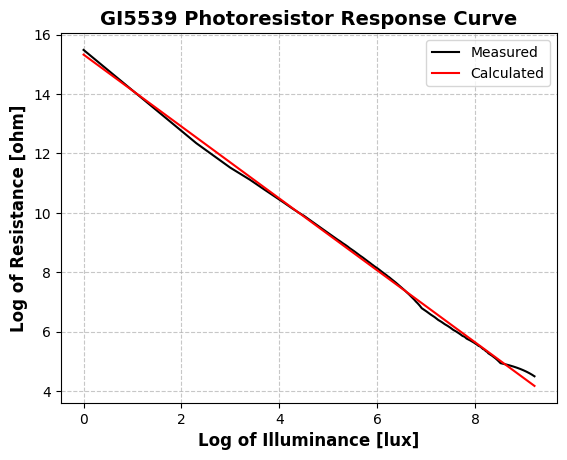

In [121]:
# Compare the calculated resistance with the measured resistance: Logarithmic values

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
    label="Measured",
)
plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_calculated_resistance_ohm"],
    color="red",
    label="Calculated",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log of Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log of Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()

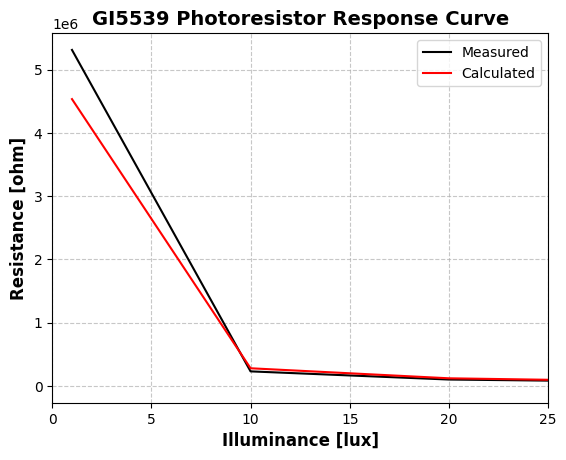

In [124]:
# Compare the calculated resistance with the measured resistance: Normal data in low range

plt.plot(
    sample_data_df["illuminance_lux"],
    sample_data_df["resistance_ohm"],
    color="black",
    label="Measured",
)
plt.plot(
    sample_data_df["illuminance_lux"],
    sample_data_df["calculated_resistance_ohm"],
    color="red",
    label="Calculated",
)
plt.xlim(0, 25)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()